<a href="https://colab.research.google.com/github/BOLLOJUAISHWARYA/DeepLearning/blob/main/Multiclass_Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Steps Involved

1. Exploring the dataset

2. Pre-processing 

3. Building the model

4. Making the predictions

5. Improving the model and repeating the process till we get the desired results



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### Dataset : weather which consists of 6872 images of 11 classes .

classes are ('dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'sandstorm', 'snow')

In [ ]:
import pathlib

data_dir = pathlib.Path('/content/drive/MyDrive/Datasets/weather')

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

6872


### Defining some parameters for the loading the dataset

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

### using 80% of the images for training, and 20% for validation.

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6872 files belonging to 11 classes.
Using 5498 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6872 files belonging to 11 classes.
Using 1374 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'sandstorm', 'snow']


### Exploring few images

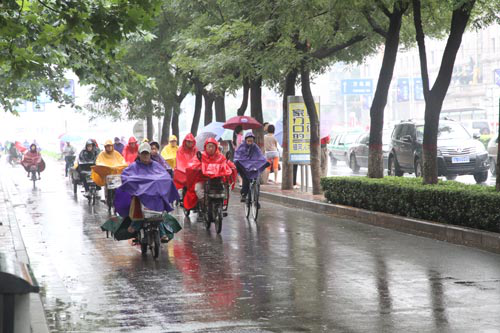

In [ ]:
rain = list(data_dir.glob('rain/*'))
PIL.Image.open(str(rain[100]))

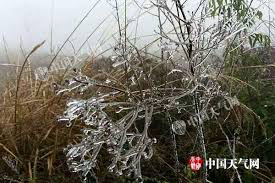

In [ ]:
glaze = list(data_dir.glob('glaze/*'))
PIL.Image.open(str(glaze[100]))

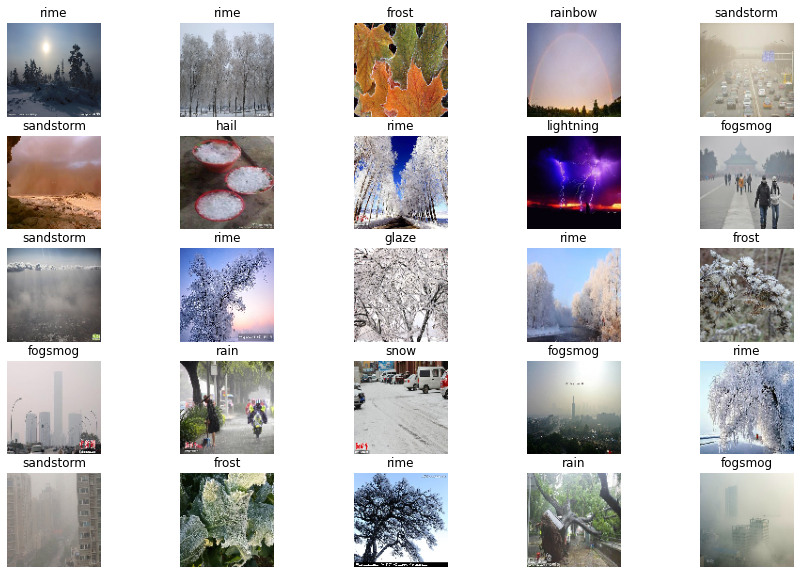

In [ ]:
import matplotlib.pyplot as plt

def plot_images(img,labels):
    plt.figure(figsize=[15,10])
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(img[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis('off')
plot_images(x,y)

### Standardizing the data and building  Sequential model consists of three convolution blocks with a max pooling layer  in each of them. There's a fully-connected layer with 128 units on top of it that is activated by a ReLU activation function ('relu')

In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
172/172 [==============================] - 249s 1s/step - loss: 1.4501 - accuracy: 0.5147 - val_loss: 1.1293 - val_accuracy: 0.6281
Epoch 2/10
172/172 [==============================] - 180s 1s/step - loss: 0.9351 - accuracy: 0.6912 - val_loss: 1.1307 - val_accuracy: 0.6179
Epoch 3/10
172/172 [==============================] - 177s 1s/step - loss: 0.7517 - accuracy: 0.7486 - val_loss: 0.9417 - val_accuracy: 0.7031
Epoch 4/10
172/172 [==============================] - 178s 1s/step - loss: 0.5343 - accuracy: 0.8212 - val_loss: 1.0478 - val_accuracy: 0.6943
Epoch 5/10
172/172 [==============================] - 178s 1s/step - loss: 0.3735 - accuracy: 0.8800 - val_loss: 0.9404 - val_accuracy: 0.7205
Epoch 6/10
172/172 [==============================] - 178s 1s/step - loss: 0.2313 - accuracy: 0.9280 - val_loss: 1.2225 - val_accuracy: 0.6907
Epoch 7/10
172/172 [==============================] - 177s 1s/step - loss: 0.1556 - accuracy: 0.9529 - val_loss: 1.4086 - val_accuracy: 0.6914

### Visualizing the training results

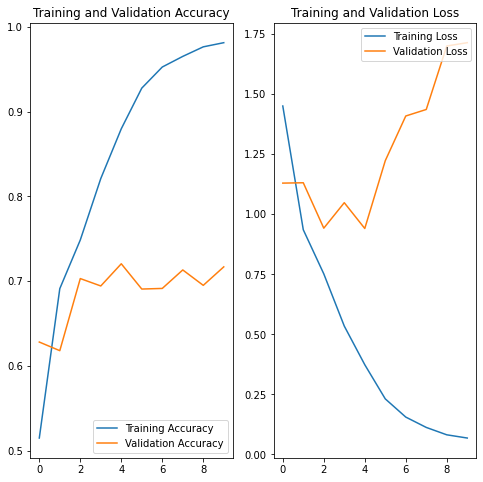

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### The plots show that training accuracy and validation accuracy are off by large margins - validation accuracy is 71% where as training accuracy 98% so our model is overfitting.

### To avoid overfitting am trying to augment the data and introduce some drop out layers in the model.

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
172/172 [==============================] - 214s 1s/step - loss: 1.5428 - accuracy: 0.4847 - val_loss: 1.2153 - val_accuracy: 0.6012
Epoch 2/15
172/172 [==============================] - 211s 1s/step - loss: 1.0856 - accuracy: 0.6268 - val_loss: 1.1619 - val_accuracy: 0.6143
Epoch 3/15
172/172 [==============================] - 209s 1s/step - loss: 0.9801 - accuracy: 0.6652 - val_loss: 1.1420 - val_accuracy: 0.6223
Epoch 4/15
172/172 [==============================] - 214s 1s/step - loss: 0.9438 - accuracy: 0.6775 - val_loss: 1.0104 - val_accuracy: 0.6747
Epoch 5/15
172/172 [==============================] - 211s 1s/step - loss: 0.9009 - accuracy: 0.6904 - val_loss: 1.0192 - val_accuracy: 0.6856
Epoch 6/15
172/172 [==============================] - 213s 1s/step - loss: 0.8461 - accuracy: 0.7066 - val_loss: 1.0476 - val_accuracy: 0.6703
Epoch 7/15
172/172 [==============================] - 212s 1s/step - loss: 0.8333 - accuracy: 0.7128 - val_loss: 1.0264 - val_accuracy: 0.6652

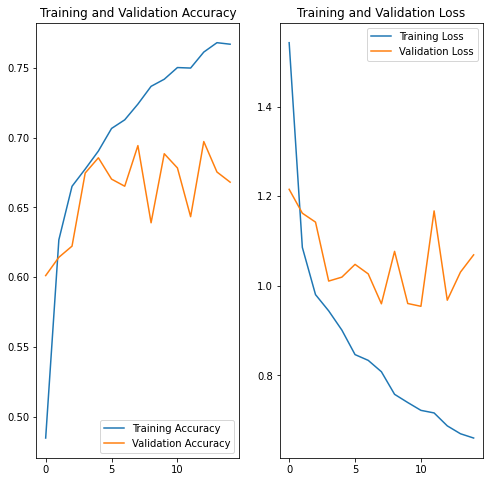

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### We can see that even after augmentation and adding drop out layers also training accuracy is 76% and validation is 66%.

### Training accuracy and validation accuracy are off by large margins , need to build another model

In [ ]:
num_classes = len(class_names)

model1 = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 15
history = model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
172/172 [==============================] - 220s 1s/step - loss: 1.5740 - accuracy: 0.4714 - val_loss: 1.2038 - val_accuracy: 0.6121
Epoch 2/15
172/172 [==============================] - 223s 1s/step - loss: 1.1078 - accuracy: 0.6233 - val_loss: 1.2520 - val_accuracy: 0.5968
Epoch 3/15
172/172 [==============================] - 220s 1s/step - loss: 1.0105 - accuracy: 0.6504 - val_loss: 1.1263 - val_accuracy: 0.6405
Epoch 4/15
172/172 [==============================] - 220s 1s/step - loss: 0.9703 - accuracy: 0.6706 - val_loss: 1.0153 - val_accuracy: 0.6550
Epoch 5/15
172/172 [==============================] - 222s 1s/step - loss: 0.9050 - accuracy: 0.6848 - val_loss: 1.0573 - val_accuracy: 0.6376
Epoch 6/15
172/172 [==============================] - 221s 1s/step - loss: 0.8764 - accuracy: 0.7015 - val_loss: 1.0711 - val_accuracy: 0.6441
Epoch 7/15
172/172 [==============================] - 222s 1s/step - loss: 0.8603 - accuracy: 0.7059 - val_loss: 0.9695 - val_accuracy: 0.6798

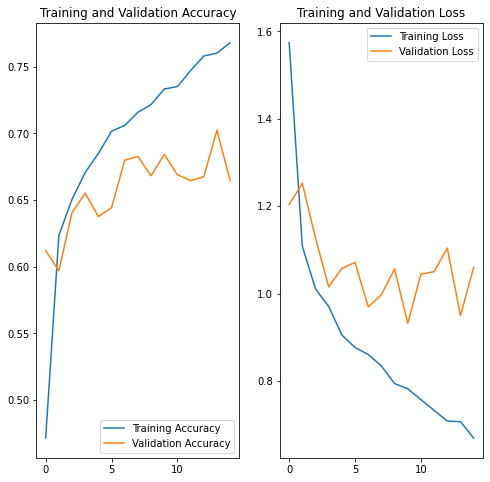

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Final model 

In [ ]:
num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
172/172 [==============================] - 631s 4s/step - loss: 1.9829 - accuracy: 0.3007 - val_loss: 1.6397 - val_accuracy: 0.4745
Epoch 2/30
172/172 [==============================] - 221s 1s/step - loss: 1.4491 - accuracy: 0.5147 - val_loss: 1.2851 - val_accuracy: 0.5320
Epoch 3/30
172/172 [==============================] - 221s 1s/step - loss: 1.1812 - accuracy: 0.5802 - val_loss: 1.1377 - val_accuracy: 0.5990
Epoch 4/30
172/172 [==============================] - 220s 1s/step - loss: 1.0905 - accuracy: 0.6077 - val_loss: 1.2148 - val_accuracy: 0.5801
Epoch 5/30
172/172 [==============================] - 219s 1s/step - loss: 1.0342 - accuracy: 0.6379 - val_loss: 1.0777 - val_accuracy: 0.6230
Epoch 6/30
172/172 [==============================] - 219s 1s/step - loss: 0.9995 - accuracy: 0.6548 - val_loss: 1.0075 - val_accuracy: 0.6696
Epoch 7/30
172/172 [==============================] - 219s 1s/step - loss: 0.9276 - accuracy: 0.6804 - val_loss: 1.0868 - val_accuracy: 0.6390

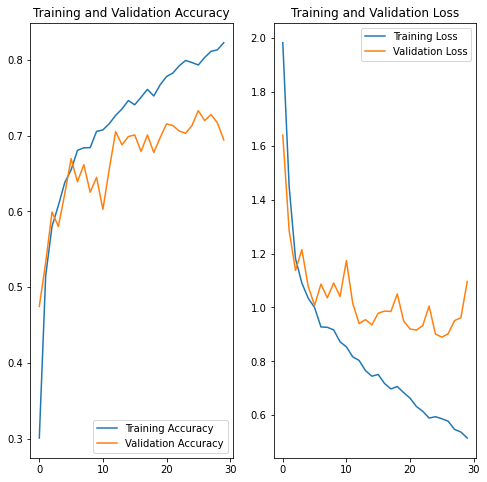

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt

In [ ]:
uploaded = files.upload()

Saving light.jpg to light.jpg


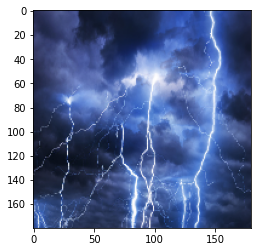

In [ ]:
img = cv2.imread('light.jpg')
img  = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (img_height, img_width)) 
plt.imshow(img)
#print(img.shape)

In [ ]:
img = (np.expand_dims(img,0))
predictions_single = model.predict(img)
#print(predictions_single)
np.argmax(predictions_single[0])
score = tf.nn.softmax(predictions_single[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to lightning with a 82.68 percent confidence.


We have built four models 

1. First model  --  3 convolution blocks(with max pooling layer in each of them)+ fully connected layer with 128 units + output layer ---- 10 epochs --- accuracy 98% and val_accuracy 71%

2. Second model  --  data augmentation + 3 convolution blocks(with max pooling layer in each of them) + 1 drop out layer + fully connected layer with 128 units + output layer ---- 15 epochs --- accuracy 76% and val_accuracy 66%

3. Third model  --  data augmentation + 3 convolution blocks(with max pooling layer in each of them) + 1 drop out layer + 2 dense layers + output layer ---- 15 epochs --- accuracy 76% and val_accuracy 66%

4. Fourth model--data augmentation + 3 convolution blocks(with max pooling layer in each of them) + 1 drop out layer + 4 dense layers + output layer ---- 30 epochs --- accuracy 82% and val_accuracy 70%